In [2]:
%load_ext autoreload
%autoreload 2

# RE-CALCULATE CVS 

In [3]:
## calculate CVs
# General Libraries
import sys, os, shutil
from glob import glob

import pickle
from copy import deepcopy
import numpy as np
import scipy
import pandas as pd
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import pyemma
import pyemma.coordinates as coor

## recalculate collective variable from trajectories

In [4]:
dir1 = u'/sc/orga/projects/filizm02a/work/ion_MOR/active/unbiased_sampling/no_lipid_water/'
trajs = [dir1+'md-%d_no_lipid_water.dcd'%i for i in range(159)]
top = dir1 + 'no_lipid_water.pdb'

In [5]:
def recalc_z(dir1,trajs,top):
    feat1 = coor.featurizer(top)
    binding_ref = feat1.select('(residue 114 or residue 150 or residue 293 or residue 326) and name CA')
    feat1.add_selection(binding_ref)
    inp = coor.source(trajs, feat1, chunk_size=100)
    cv1 = inp.get_output()

    feat2 = coor.featurizer(top)
    ion = feat2.select('(residue 1) and name SOD')
    feat2.add_selection(ion)
    inp2 = coor.source(trajs, feat2, chunk_size=100)
    cv2 = inp2.get_output()

    ## keep only z_value and average
    z_binding_ref = [np.mean(cv[:,2::3],axis=1) for cv in cv1]
    z_ion2 = [np.mean(cv[:,2::3],axis=1) for cv in cv2]

    ## do difference of z-values
    cv_z = [10*(z_i-z_b)  for (z_b,z_i) in zip(z_binding_ref,z_ion2)]
    return cv_z

In [6]:
MD_cvz = recalc_z(dir1,trajs,top)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


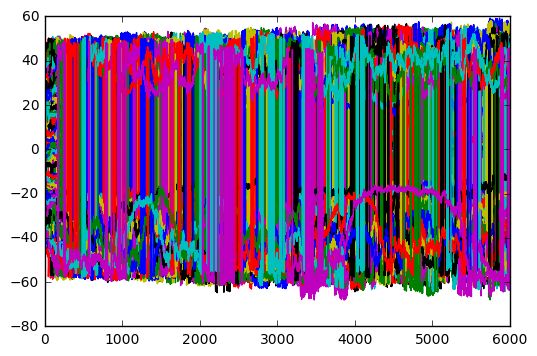

In [7]:
for cv in MD_cvz:
    plt.plot(cv)
#plt.plot(MD_traj[4])
plt.show()

In [8]:
dir2 = u'/sc/orga/projects/filizm02a/work/ion_MOR/active/umbrella_sampling//no_lipid_water/'
trajs2 = [dir2+'pmf%d_no_lipid_water.dcd'%i for i in range(159)]
top2 = dir2 + 'pmf0_no_lipid_water.pdb'

US_cvz = recalc_z(dir2,trajs2,top2)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


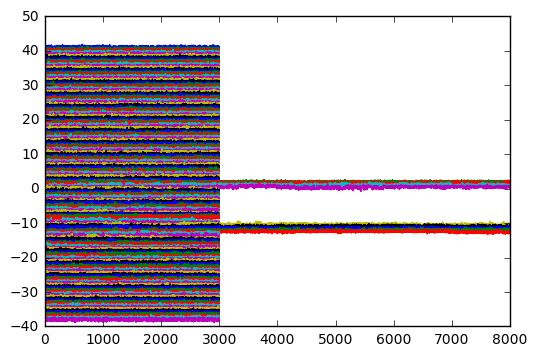

In [9]:
for cv in US_cvz:
    plt.plot(cv)
#plt.plot(MD_traj[4])
plt.show()

In [ ]:
## calculate chi dihedral

In [10]:
def recalc_dih(dir1,trajs,top):
    feat1 = coor.featurizer(top)
    feat1.add_chi1_torsions('residue 336 and protein',cossin=True)
    inp = coor.source(trajs, feat1, chunk_size=100)
    cv1 = inp.get_output()

    return cv1

In [11]:
MD_dih = recalc_dih(dir1,trajs,top)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [72]:
cv2=np.vstack(((np.concatenate(MD_dih)[:,1]),np.concatenate(MD_cvz)))

In [ ]:
plt.figure(figsize=(10,3))
ax =pyemma.plots.plot_free_energy(cv2[1,:], cv2[0,:],);
(ax[1]).set_xlabel("ion z position")
(ax[1]).set_ylabel("Y336 chi1 dihedral")

plt.show()

In [12]:
inactive_res = [["ASN", 104 ], ["LEU", 110 ], ["ALA", 111 ], ["ALA", 113 ], 
              ["ASP", 114 ], ["ALA", 117 ], ["THR", 120 ], ["GLN", 124 ], 
              ["ASN", 127 ], ["TYR", 128 ], ["GLY", 131 ], ["VAL", 143 ], 
              ["ILE", 144 ], ["ASP", 147 ], ["ASN", 150 ], ["MET", 151 ], 
              ["SER", 154 ], ["ILE", 155 ], ["LEU", 176 ], ["ASP", 177 ], 
              ["THR", 180 ], ["THR", 207 ], ["THR", 208 ], ["LYS", 209 ], 
              ["ARG", 211 ], ["SER", 214 ], ["ASP", 216 ], ["CYS", 217 ], 
              ["THR", 218 ], ["LEU", 219 ], ["THR", 220 ], ["PHE", 221 ], 
              ["THR", 225 ], ["TRP", 226 ], ["GLU", 229 ], ["ASN", 230 ], 
              ["ALA", 240 ], ["ILE", 278 ], ["MET", 281 ], ["VAL", 285 ], 
              ["PHE", 289 ], ["TRP", 293 ], ["LEU", 305 ], ["THR", 307 ], 
              ["GLU", 310 ], ["THR", 311 ], ["THR", 315 ], ["TRP", 318 ], 
              ["HSD", 319 ], ["GLY", 325 ], ["TYR", 326 ], ["ASN", 328 ], 
              ["ASN", 332 ], ["TYR", 336 ], ["ASP", 340 ], ["ASN", 342 ], 
              ["PHE", 343 ]]

active_res = [["LYS", 100 ], ["ASN", 104 ], ["ILE", 107 ], ["LEU", 110 ], 
              ["ALA", 111 ], ["ALA", 113 ], ["ASP", 114 ], ["ALA", 117 ], 
              ["GLN", 124 ], ["ASN", 127 ], ["TYR", 128 ], ["MET", 130 ], 
              ["GLY", 131 ], ["THR", 132 ], ["TRP", 133 ], ["ASN", 137 ], 
              ["ILE", 144 ], ["ASP", 147 ], ["TYR", 148 ], ["ASN", 150 ], 
              ["MET", 151 ], ["SER", 154 ], ["ARG", 165 ], ["VAL", 173 ], 
              ["ASP", 177 ], ["THR", 207 ], ["THR", 208 ], ["LYS", 209 ], 
              ["ARG", 211 ], ["GLY", 213 ], ["SER", 214 ], ["ASP", 216 ], 
              ["CYS", 217 ], ["THR", 218 ], ["LEU", 219 ], ["THR", 220 ], 
              ["PHE", 221 ], ["THR", 225 ], ["GLU", 229 ], ["ASN", 230 ], 
              ["TRP", 293 ], ["HSD", 297 ], ["LYS", 303 ], ["LEU", 305 ], 
              ["ILE", 306 ], ["THR", 307 ], ["ILE", 308 ], ["GLU", 310 ], 
              ["THR", 311 ], ["THR", 315 ], ["TRP", 318 ], ["HSD", 319 ], 
              ["TYR", 326 ], ["SER", 329 ], ["ASN", 332 ], ["PRO", 333 ], 
              ["LEU", 335 ], ["TYR", 336 ], ["ALA", 337 ], ["ASP", 340 ], 
              ["ASN", 342 ], ["ARG", 345 ], ["GLU", 349 ]]

## which of the inactive are not in the active
inactive_not_in_active = [inactive for inactive in inactive_res if not any([inactive == active for active in active_res])]
residue_list = inactive_not_in_active + active_res


In [79]:
inactive_not_in_active

[['THR', 120],
 ['VAL', 143],
 ['ILE', 155],
 ['LEU', 176],
 ['THR', 180],
 ['TRP', 226],
 ['ALA', 240],
 ['ILE', 278],
 ['MET', 281],
 ['VAL', 285],
 ['PHE', 289],
 ['GLY', 325],
 ['ASN', 328],
 ['PHE', 343]]

In [14]:
## residue numbers in `residue_list` are not indices, let's convert
feat1 = coor.featurizer(top)

residue_index = [ [i for i in range(feat1.topology.n_residues) 
   if feat1.topology.residue(i).resSeq==res[1] and 
                   (feat1.topology.residue(i).name==res[0] or 
                    (feat1.topology.residue(i).name=='HIS' and res[0]=='HSD')
                   )][0]  for res in residue_list]

pair_list = np.array([(a,b) for a in residue_index for b in residue_index if a<b ])
feat1.add_residue_mindist(pair_list, scheme="closest-heavy")
feat1.dimension()
inp = coor.source(trajs, feat1, chunk_size=100)
#cv1 = inp.get_output()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [15]:
inp

In [16]:
tica_obj = coor.tica(inp, lag=20, var_cutoff=0.5, kinetic_map=True,stride=300)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [17]:
tics = tica_obj.get_output()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [21]:
pickle.dump(tics,open("tics-20.pkl","wb"))

In [73]:
cvz = np.concatenate([t[:] for t in MD_cvz])
cvT = np.concatenate(tics)

In [74]:
cv_all = np.hstack((cvz.reshape((len(cvz),1)),cvT))
cv_all.shape

(952213, 138)

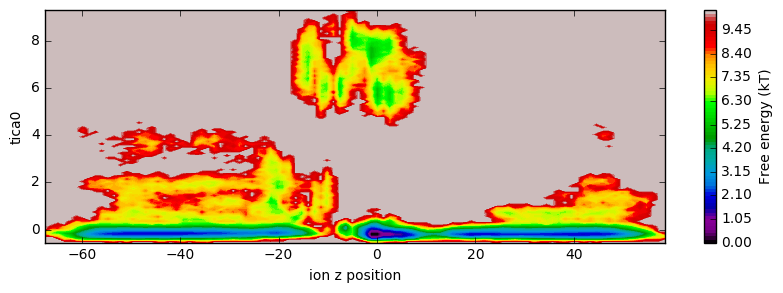

In [75]:
plt.figure(figsize=(10,3))
ax =pyemma.plots.plot_free_energy(cv_all[:,0], cv_all[:,1],);
(ax[1]).set_xlabel("ion z position")
(ax[1]).set_ylabel("tica0")
plt.show()

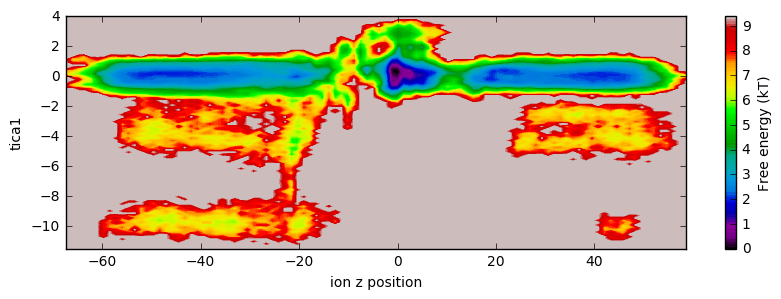

In [82]:
plt.figure(figsize=(10,3))
ax =pyemma.plots.plot_free_energy(cv_all[:,0], cv_all[:,4],);
(ax[1]).set_xlabel("ion z position")
(ax[1]).set_ylabel("tica1")
plt.show()

In [54]:
cf=tica_obj.feature_TIC_correlation

In [65]:
descriptions = np.array(feat1.describe())

In [66]:
high_corr0 = np.where(np.abs(cf[:,0])>.7)[0]
high_corr1 = np.where(np.abs(cf[:,1])>.7)[0]
descriptions[high_corr0]

array(['RES_DIST (closest-heavy) ALA240 - ASN332',
       'RES_DIST (closest-heavy) VAL285 - LEU335',
       'RES_DIST (closest-heavy) ILE107 - TYR336',
       'RES_DIST (closest-heavy) LEU110 - LEU335',
       'RES_DIST (closest-heavy) LEU110 - TYR336',
       'RES_DIST (closest-heavy) ALA111 - ASN332',
       'RES_DIST (closest-heavy) VAL173 - LEU335',
       'RES_DIST (closest-heavy) ASP177 - LEU335',
       'RES_DIST (closest-heavy) TRP293 - ASN332',
       'RES_DIST (closest-heavy) THR315 - TYR336',
       'RES_DIST (closest-heavy) HIS319 - TYR336'], 
      dtype='|S40')

In [67]:
descriptions[high_corr1]

array(['RES_DIST (closest-heavy) VAL143 - ASN150',
       'RES_DIST (closest-heavy) ALA111 - TYR148',
       'RES_DIST (closest-heavy) ALA113 - TYR148',
       'RES_DIST (closest-heavy) ALA113 - ASN150',
       'RES_DIST (closest-heavy) ASP114 - TYR148',
       'RES_DIST (closest-heavy) ASP114 - ASN150',
       'RES_DIST (closest-heavy) ALA117 - TYR148',
       'RES_DIST (closest-heavy) TRP133 - ASN150'], 
      dtype='|S40')

In [77]:
cvm=cv_all[:,0:3]

In [ ]:
pyemma.coordinates.

## READ ORIGINAL CVs

In [23]:
from utils import *

In [24]:
MORstate='active'
dir = "/sc/orga/projects/filizm02a/work/ion_MOR/"+MORstate
dir_US = dir + '/umbrella_sampling/'
dir_US_cv = dir_US + '/cv_z_Nwater/'

dir_MD = dir + '/unbiased_sampling/'
dir_MD_cv = dir_MD + '/cv_z_Nwater/'

## how long are the trajectories?
## with no striding, 1 frame = 2 ps 
timestep = 2./1000 # in ns
(US_traj, meta_info,  MD_traj, US_len, MD_len) = load_data_cv_only(
    dir_US_cv,  u'/um_both-%d.dat',
    dir_MD_cv, u'/full-%d.dat')


Read 159 traj for US runs from /sc/orga/projects/filizm02a/work/ion_MOR/active/umbrella_sampling//cv_z_Nwater/
Read 159 traj for MD runs from /sc/orga/projects/filizm02a/work/ion_MOR/active/unbiased_sampling//cv_z_Nwater/


In [ ]:
## compare MD
ii=40
plt.plot(MD_cvz[ii],label='mdtraj')
plt.plot(MD_traj[ii],label='yibo')
plt.title("traj %d"%ii)
plt.legend()
plt.show()

In [ ]:
## compare US
ii=40
#plt.plot(US_cvz[ii],label='mdtraj')
#plt.plot(US_traj[ii],label='yibo')
plt.plot(US_cvz[ii],US_traj[ii])

plt.title("traj %d"%ii)
plt.legend()
plt.show()

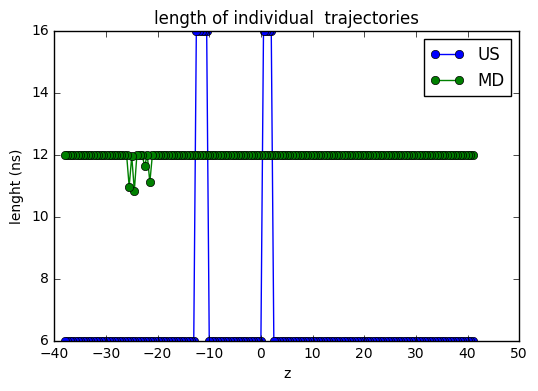

In [78]:
centers = np.array(meta_info[:,1])
plt.plot(centers,timestep*US_len,'-o',label='US')
plt.plot(centers,timestep*MD_len,'-o',label='MD')
plt.legend()
plt.title("length of individual  trajectories")
plt.xlabel('z')
plt.ylabel('lenght (ns)')
plt.show()

In [ ]:
## inspect trajectories
subset = slice(20,50)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].set_ylabel('z')

for traj in US_traj[subset]:
    axes[0].plot(traj[0::10])
for traj in MD_traj[subset]:
    axes[1].plot(traj[0::10])
plt.show()

In [ ]:
#### split unbiased trajs across the box

maxv = [np.max(cv) for cv in MD_cvz]
minv = [np.min(cv) for cv in MD_cvz]
mmax = np.max(maxv)
mmin = np.min(minv)
plt.plot(maxv)
plt.plot(minv)
plt.axhline(mmax,linestyle='dashed')
plt.axhline(mmin,linestyle='dashed')
plt.show()
#mmax-mmin

In [ ]:
def splitbox(trajs, box,cutoff=100):
    original_lenghts = [len(traj) for traj in trajs]
    original_number = len(trajs)
    original_desc = ( np.array(original_lenghts).sum(), original_number)
    print("Original: %d frames in %d trajectories"% original_desc)
    trajs2=[]
    for traj in trajs:
        diff = traj[1:]-traj[:-1]
        bkpts = np.where(abs(diff)>=box)[0]
        bkpts = np.concatenate([
           np.array([0]),
           bkpts+1,
           np.array([len(traj)])])
        for i,b in enumerate(bkpts[:-1]):
            if len(traj[b:bkpts[i+1]])>cutoff:
                 trajs2.append(traj[b:bkpts[i+1]])
    new_lenghts = [len(traj) for traj in trajs2]
    new_number = len(trajs2)
    new_desc = ( np.array(new_lenghts).sum(), new_number)
    print("New: %d frames in %d trajectories"% new_desc)
    return trajs2


In [ ]:
MD_cvz_split=splitbox(MD_cvz,100)

In [ ]:
for cv in MD_cvz_split[0:700]:
    plt.plot(cv)
#plt.plot(MD_traj[4])
plt.show()

##  Estimation (no bootstrap)

In [ ]:
pickle.dump(MD_cvz_split,open("z_split_MD.pkl",'wb'))
pickle.dump(US_cvz,open("z_US.pkl",'wb'))

In [3]:
MD_cv_ = pickle.load(open("z_split_MD.pkl",'rb'))
US_cv_ = pickle.load(open("z_US.pkl",'rb'))


In [9]:
d1 = discretization(US_cv_ , MD_traj=MD_cv_,
      meta_info=meta_info, nbins=200)


US traj. cover -38.867455,41.926216
MD traj. cover -68.029755,59.237801
 discretizing with 200, dx=0.636338


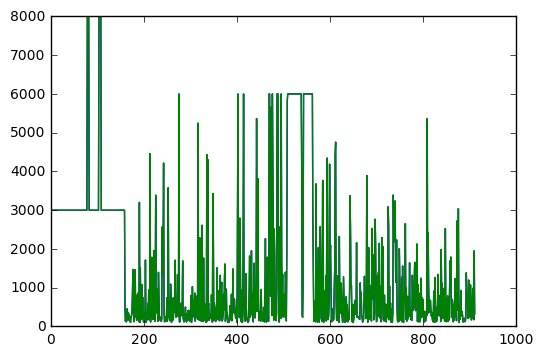

In [12]:
plt.plot([len(t) for t in d1.dtrajs])
plt.show()
unbiased=d1.dtrajs[d1.MD_set]

In [13]:
its=pyemma.msm.timescales_msm(unbiased,lags=[1,5,10,20,50])

12-06-17 18:34:20 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[1] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/sc/orga/projects/filizm02a/general/software/anaconda/miniconda2/envs/dimerization_project/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


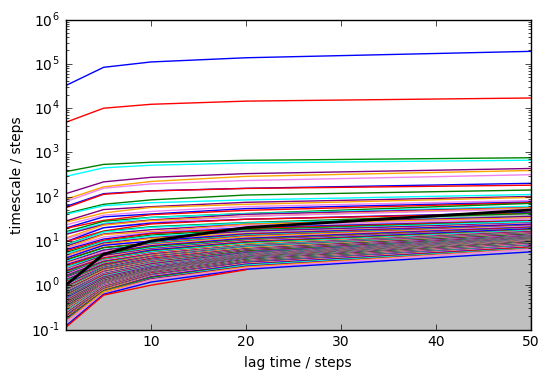

In [14]:
pyemma.plots.plot_implied_timescales(its)
plt.show()

In [15]:
msm=pyemma.msm.estimate_markov_model(unbiased,lag=20)

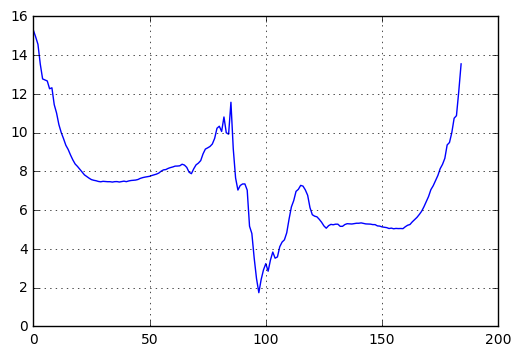

In [16]:
plt.plot(-np.log(msm.pi))
plt.grid()
plt.show()

In [25]:
US_cv2=[c.astype('double') for c in US_cv_]
MD_cv2=[c.astype('double') for c in MD_cv_]

d2 = discretization(US_cv2[0:10] , MD_traj=MD_cv2,
      meta_info=meta_info[0:10], nbins=200)
e2 = my_estimate(discr=d2,estimator='tram',lag=20)

US traj. cover 35.752445,41.926216
MD traj. cover -68.029755,59.237801
 discretizing with 200, dx=0.636338

 Running TRAM with lag 20... 


/sc/orga/projects/filizm02a/general/software/anaconda/miniconda2/envs/dimerization_project/lib/python2.7/site-packages/pyemma/thermo/estimators/TRAM_estimator.py:335: NotConvergedWarning: TRAM did not converge: last increment = 3.23358e-05
  N_dtram_accelerations=self.N_dtram_accelerations)


In [31]:

d3 = discretization(US_cv2[0:50] , MD_traj=MD_cv2,
      meta_info=meta_info[0:50], nbins=200)
e3 = my_estimate(discr=d3,estimator='tram',lag=20)

US traj. cover 15.626825,41.926216
MD traj. cover -68.029755,59.237801
 discretizing with 200, dx=0.636338

 Running TRAM with lag 20... 


/sc/orga/projects/filizm02a/general/software/anaconda/miniconda2/envs/dimerization_project/lib/python2.7/site-packages/pyemma/thermo/estimators/TRAM_estimator.py:335: NotConvergedWarning: TRAM did not converge: last increment = 2.64194e-05
  N_dtram_accelerations=self.N_dtram_accelerations)


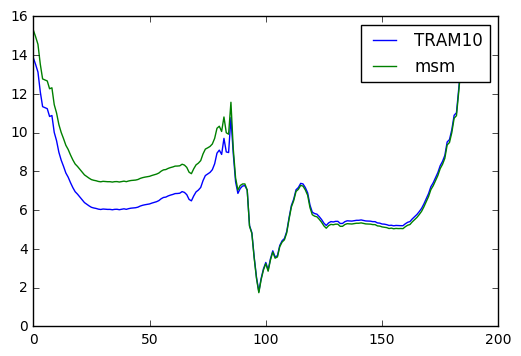

In [29]:
plt.plot(e2.tram.free_energies,label='TRAM10')
plt.plot(-np.log(msm.pi),label='msm')

plt.legend()
plt.show()

In [30]:
meta_info[0:10]

array([[  0. ,  41. ,  10. ,   0. ,   0. ,   0. ],
       [  1. ,  40.5,  10. ,   0. ,   0. ,   0. ],
       [  2. ,  40. ,  10. ,   0. ,   0. ,   0. ],
       [  3. ,  39.5,  10. ,   0. ,   0. ,   0. ],
       [  4. ,  39. ,  10. ,   0. ,   0. ,   0. ],
       [  5. ,  38.5,  10. ,   0. ,   0. ,   0. ],
       [  6. ,  38. ,  10. ,   0. ,   0. ,   0. ],
       [  7. ,  37.5,  10. ,   0. ,   0. ,   0. ],
       [  8. ,  37. ,  10. ,   0. ,   0. ,   0. ],
       [  9. ,  36.5,  10. ,   0. ,   0. ,   0. ]])

### single point estimation (WHAM)

In [24]:
[c.astype('double') for c in US_cv_]

[array([ 41.42628098,  41.08990479,  41.49515533, ...,  41.31654358,
         40.83872986,  40.89530563]),
 array([ 40.54708481,  40.72989655,  40.57260895, ...,  40.54506302,
         40.51132584,  40.52040482]),
 array([ 40.36249161,  39.7020607 ,  39.94628525, ...,  40.19431686,
         40.30474854,  40.38297653]),
 array([ 39.5049057 ,  39.86071014,  39.14208221, ...,  39.21962357,
         39.59186172,  39.21121597]),
 array([ 39.1263237 ,  39.13885498,  39.11813736, ...,  38.91996765,
         39.2121048 ,  39.10995483]),
 array([ 38.46264648,  38.39792633,  38.60118103, ...,  38.67201996,
         38.57636261,  38.32325363]),
 array([ 37.92237854,  37.65953064,  38.11019897, ...,  38.23657227,
         38.27209854,  38.22234726]),
 array([ 37.30172729,  37.41707611,  37.44829559, ...,  37.47562408,
         37.41591644,  37.12409592]),
 array([ 36.95467377,  36.9090538 ,  36.93391037, ...,  37.32872391,
         36.89440155,  36.94000626]),
 array([ 36.62696075,  36.33524323,  

* @Yibo check the bin and stride I'm using big strides and large bins here for speed, these don't have to be the final values
* also, check max_iter and error limits in the `my_estimate` class

In [ ]:
## do a single point estimation for given bins, and stride
d1 = discretization(US_traj , MD_traj=[], meta_info=meta_info, nbins=100)
e1 = my_estimate(d1,estimator='wham', stride=20, verbose=True)

In [ ]:
plt.plot(e1.wham.free_energies)
plt.title("WHAM complete, single point")
plt.ylabel("fes kcal/mol")
plt.grid()
plt.show()

### single point WHAM parameter seacrh
try three different discretizations and different strides

In [ ]:
## NOT RUN
## bookkeeping is totally missing here, don't run before fixing

bin_list = [100,200,500]
stride_list = [10,20,100]
for nbins in bin_list:
    d = discretization(US_traj , MD_traj, meta_info=meta_info, nbins)
    for stride in stride_list:
        e = my_estimate(d,estimator='wham', stride=stride)


###  single point estimation (TRAM)

In [ ]:
## do a single point estimation for given bins, and stride
d2 = discretization(US_traj[1:100] , MD_traj, meta_info=meta_info[1:100], nbins=200)
e2 = my_estimate(d2,estimator='tram', lag=5, stride=10, verbose=True)

In [ ]:
e2.tram

In [ ]:
#pickle.dump(e1.tram,open('test-tram.pkl','wb'))


plt.plot(e2.tram.free_energies)
plt.show()

In [ ]:
plt.plot(e1.tram.free_energies)
plt.title("WHAM complete, single point")
plt.ylabel("fes kcal/mol")
plt.grid()
plt.show()

## Estimation (bootstrap)

### estimate WHAM with bootstrap 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## define one discretization to bootstrap from 
d1 = discretization(US_traj , MD_traj=[], meta_info=meta_info, nbins=50)

In [ ]:
bstrp = ensemble(d1,n_from_each=20,fraction_length=.05)
bstrp.run(2, estimator='wham',stride=100)

In [ ]:
bstrp.describe()
#bstrp.run(2, estimator='wham',stride=100)

### bootstrap TRAM

In [ ]:
## NOT RUN
d1 = discretization(US_traj , MD_traj=MD_traj,
      meta_info=meta_info, nbins=100)

bstrp = ensemble(d1,n_from_each=10,fraction_length=.1)
bstrp.run(3, estimator='tram',lag=5, stride=10)


### readback

In [ ]:
bstrp2 = ensemble()
bstrp2.readall('tram-ensemble.pck')
bstrp2.addsaveddata('tram-ensemble2.pck')
bstrp2.describe()


In [ ]:
bstrp2.plot()

In [ ]:
np.argmax(bstrp2.full.centers)

In [ ]:
rr=(bstrp2.samples[0]).tram

In [ ]:



stride=10
for estimation in bstrp2.samples:
    rr = estimation.tram
    index_min=np.argmin(rr.free_energies)
    index_max= 96
    index_full_min = (rr.active_set)[index_min]
    z_min = bstrp2.full.centers[index_full_min]
    tin = rr.msm.mfpt(A=[index_max], B=[index_full_min])
    tout = rr.msm.mfpt(A=[index_full_min],B=[index_max])
    
    #print((index_full_min,index_max))
    print((z_min,2*stride*tin*(1.e-3),2*stride*tout*(1.e-6)))


In [ ]:
index_min=np.argmin(rr.free_energies)
index_full_min = (rr.active_set)[index_min]
z_min = bstrp2.full.centers[index_full_min]



In [ ]:
plt.axvline(x=z_min,linestyle='dashed',color='red')
bstrp2.plot()
plt.show()